In [3]:
#data loading
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
#Normalize using reshape
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')/255

In [6]:
#One hot encoder
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


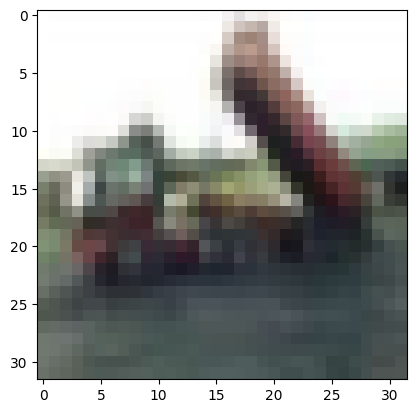

In [7]:
#printing labels along with images
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
print(y_train[2])

In [8]:
# Building Bidirectional LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate, Reshape

#Building LSTM Model
inputs = Input(shape=(32, 32, 3))
reshaped_inputs = Reshape((32, 32 * 3))(inputs)
forward_layer = LSTM(128, return_sequences=False)
backward_layer = LSTM(128, return_sequences = False, go_backwards = True)

forward_output = forward_layer(reshaped_inputs)
bankward_output = backward_layer(reshaped_inputs)
output= concatenate([forward_output, bankward_output])
output = Dense(10, activation='softmax')(output)

model = Model(inputs=inputs, outputs=output)

In [9]:
#Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 32, 96)    │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │    115,200 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 128)       │    115,200 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │      2,570 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 232,970 (910.04 KB)

 Trainable params: 232,970 (910.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#model fiting
history = model.fit(x_train,y_train,epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3111 - loss: 1.8933 - val_accuracy: 0.4339 - val_loss: 1.5639
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4465 - loss: 1.5410 - val_accuracy: 0.4989 - val_loss: 1.4010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4931 - loss: 1.4067 - val_accuracy: 0.5172 - val_loss: 1.3376
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5268 - loss: 1.3220 - val_accuracy: 0.5253 - val_loss: 1.3182
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5510 - loss: 1.2481 - val_accuracy: 0.5534 - val_loss: 1.2417
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5746 - loss: 1.1844 - val_accuracy: 0.5467 - val_loss: 1.2598
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5942 - loss: 1.1272 - val_accuracy: 0.5642 - val_loss: 1.2079
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6131 - loss: 1.0833 - val_

In [12]:
#model Evaluation
train_loss, train_acc = model.evaluate(x_test, y_test)
print("Train Accuracy: ",train_acc)
print("Train Loss: ",train_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5700 - loss: 1.2036
Train Accuracy:  0.5745999813079834
Train Loss:  1.1966733932495117


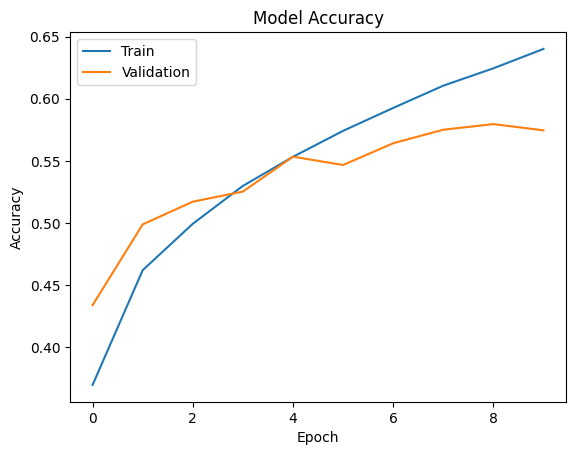

In [13]:
#Graph accuracy v/s validation
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

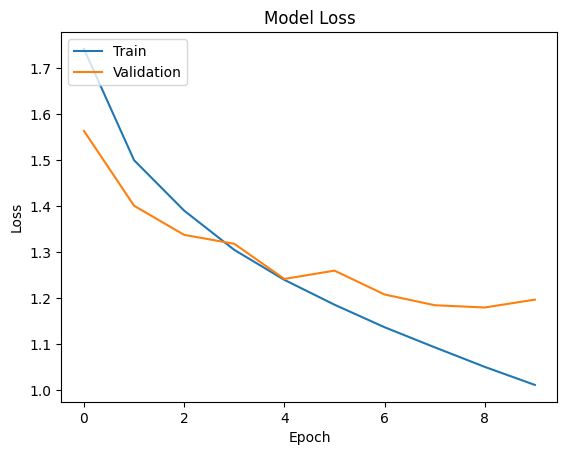

In [14]:
#Graph: loss v/s validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
